In [ ]:
from display import *
from scipy import stats
total = 186
target_recall = 0.7
thres = 10
label_name_s = ['keymove', 'jump', 'costopall', 'wrap', 'cochangescore', 'movetomouse','moveanimate']
count_s_all = {}


def get_summary_present(label_name, total, thres, target_recall):
    all_simulation = load_obj('all_simulation_'+label_name,'/Users/wwang33/Documents/IJAIED20/src/workspace/data/game_labels_'+str(total), 'simulation_'+ str(thres) +"_"+ str(target_recall))
    count_s = []
    for simulation in all_simulation:
        count_s.append(simulation.count)
    median_index = np.argsort(count_s)[len(count_s) // 2]
    all_simulation[median_index].plot("/Users/wwang33/Documents/IJAIED20/src/workspace/data/game_labels_186/simulation_10_0.7/plots/", show = True)
    print(label_name)
    print("total_real_positive: ",  all_simulation[median_index].est_num)
    # plot_real(all_simulation[median_index],"/Users/wwang33/Documents/IJAIED20/src/workspace/data/game_labels_186/simulation_10_0.7/plots/")
    print("total time of review: ", all_simulation[median_index].count)
    print(count_s)
    print(stats.describe(count_s))
#     count_s_all[label_name] = (count_s)

for label_name in label_name_s:
    get_summary_present(label_name, total, thres, target_recall)


In [1]:
target_recall = 0.95
thres = 10
label_name_s = ['keymove', 'jump', 'costopall', 'wrap', 'cochangescore', 'movetomouse','moveanimate']
count_s_all = {}

for label_name in label_name_s:
    get_summary_present(label_name, total, thres, target_recall)

NameError: name 'get_summary_present' is not defined

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


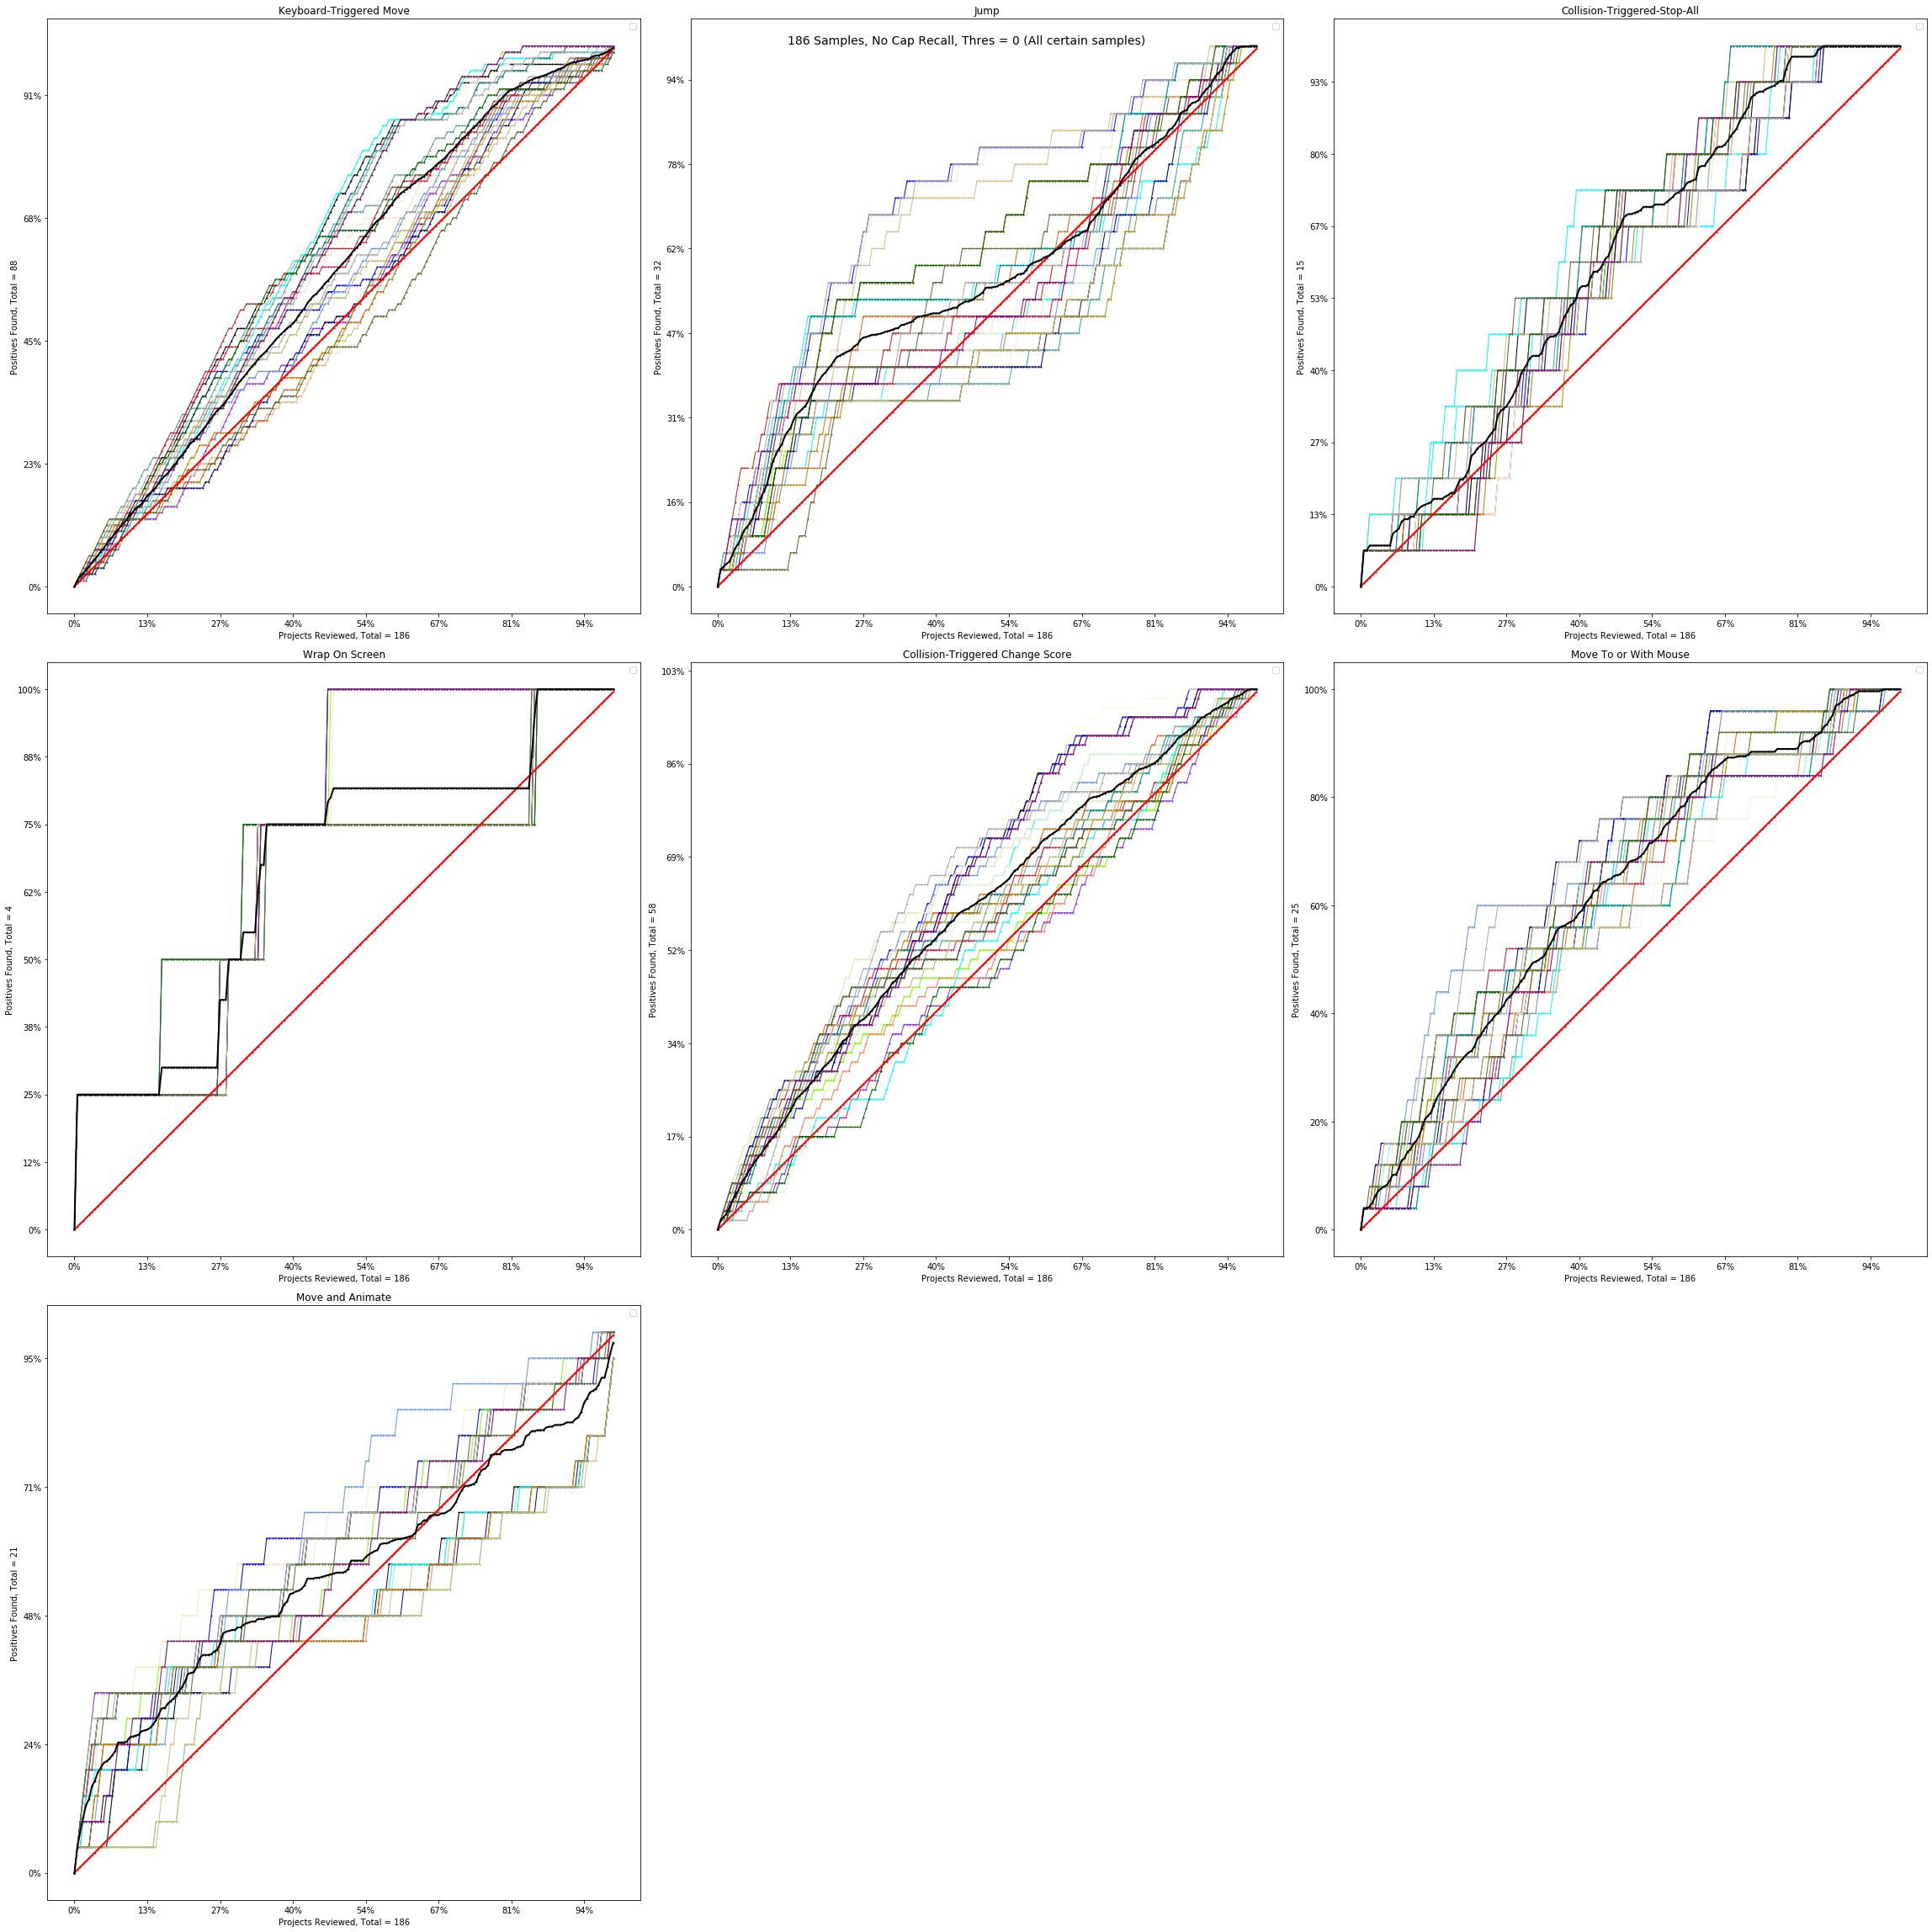

In [10]:
from simulate_game import *
from simulate_game_all import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
label_name_dict =  {'keymove': "Keyboard-Triggered Move", 'jump': "Jump", 'costopall': "Collision-Triggered-Stop-All",
                    'wrap': "Wrap On Screen", 'cochangescore': "Collision-Triggered Change Score",
                    'movetomouse': "Move To or With Mouse",'moveanimate': "Move and Animate"}
from matplotlib.ticker import PercentFormatter

from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

from scipy import stats
total = 186
target_recall = 0.7
thres = 0
label_name_s = ['keymove', 'jump', 'costopall', 'wrap', 'cochangescore', 'movetomouse','moveanimate']
count_s_all = {}


# def plot_all(label_name, total, thres, target_recall):



def get_summary(label_name, total, thres, target_recall):
    all_simulation = load_obj('all_simulation_'+label_name,'/Users/wwang33/Documents/IJAIED20/src/workspace/data/game_labels_'+str(total), 'simulation_'+ str(thres) +"_"+ str(target_recall))
    count_s = []
    for simulation in all_simulation:
        count_s.append(simulation.count)
    median_index = np.argsort(count_s)[len(count_s) // 2]
    all_simulation[median_index].plot("/Users/wwang33/Documents/IJAIED20/src/workspace/data/game_labels_186/simulation_10_" + str(target_recall) + "/plots/", show = True)
    # plot_real(all_simulation[median_index],"/Users/wwang33/Documents/IJAIED20/src/workspace/data/game_labels_186/simulation_10_0.7/plots/")
    print(all_simulation[median_index].count)
    count_s_all[label_name] = (count_s)

# def plot_average_from_all(label_name, total, thres= 0):

total = 186
thres = 0


fig = plt.figure(figsize=(32, 32))
gs = fig.add_gridspec(3, 3)

plt.suptitle("186 Samples, No Cap Recall, Thres = 0 (All certain samples)", fontsize=14)
for label_index, label_name in enumerate(label_name_s):
    all_simulation = load_obj('all_simulation_' + label_name,
                '/Users/wwang33/Documents/IJAIED20/src/workspace/data/game_labels_' + str(total),
                'simulation_' + str(thres) + "_" + "all")
    game = all_simulation[0]
    total_pos = game.est_num
    def get_x_y_for_plot(game_instance):
        order = np.argsort(np.array(game_instance.body['time'])[game_instance.labeled])
        seq = np.array(game_instance.body['code'])[np.array(game_instance.labeled)[order]]
        counter = 0
        rec = [0]
        for s in seq:
            if s == 'yes':
                counter += 1
            rec.append(counter)
        return range(len(rec)), rec
    x_axis = get_x_y_for_plot(all_simulation[0])[0]
    baseline_y = []
    average_y = []

    for number in x_axis:
        baseline_y.append(number * total_pos/total)
        this_sum = 0
        for iteration_item in range(30):
            this_sum += get_x_y_for_plot(all_simulation[iteration_item])[1][number]
        average_y.append(this_sum/30)

    color_s = [i for i in mcolors.CSS4_COLORS.keys()]
    params = {'figure.autolayout': True, 'figure.figsize': (8, 4)}
    ax1 = fig.add_subplot(gs[label_index//3, label_index%3])
    plt.ylabel("Positives Found, Total = " + str(total_pos))
    plt.xlabel("Projects Reviewed, Total = " + str(total))
    plt.rcParams.update(params)
    for i in range(30):
        plt.plot(x_axis, get_x_y_for_plot(all_simulation[i])[1], marker='o', markerfacecolor='blue', markersize=1,
                 color=color_s[i], linewidth=1)
    plt.plot(x_axis, baseline_y, marker='o', markerfacecolor='red', markersize=1,
             color='red', linewidth=2)
    plt.plot(x_axis, average_y, marker='o', markerfacecolor='black', markersize=1,
             color='black', linewidth=2)
    plt.legend()

    plt.gca().set_yticklabels(['{:.0f}%'.format(x * 100/total_pos) for x in plt.gca().get_yticks()])
    plt.gca().set_xticklabels(['{:.0f}%'.format(x * 100/total) for x in plt.gca().get_xticks()])
    plt.title(label_name_dict[label_name])
    # plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    # plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    # ax.xaxis.set_major_formatter(NullFormatter())
    # ax.yaxis.set_major_formatter(NullForatter())
    plt.axis('tight')
    plt.savefig("/Users/wwang33/Desktop/" + 'fig.png')
    # plt.close()

fig.savefig("/Users/wwang33/Desktop/" + 'figAll.png')

#
# for label_name in label_name_s:
#     plot_average_from_all(label_name, total, thres)

# label_name = 'cochangescore'
# plot_average_from_all(label_name, total, thres)